# Import modules

In [1]:
import os
import json
import matplotlib.pyplot as plt

Given a folder, it will read the historical from the json file generated by the output of models

In [2]:
def read_json_history_files_from_folder(path_history):
    #Get the names of every model stored in the specified foler
    filenames = [filename for filename in os.listdir(path_history) if filename.endswith('.json')]
    historical_array, networks_names = [], []

    for filename in filenames:
        with open(os.path.join(path_history, filename), 'r') as json_file:
            #Save the data from every json file in an array
            historical_array.append(json.load(json_file))
            #Save the name of every model in an array with the extension '.json'
            networks_names.append(filename[:-5])
    return historical_array, networks_names

Function to plot the acc, val acc, loss and val loss

In [3]:
def plot_history_models(path_history):

    historical_array, networks_names = read_json_history_files_from_folder(path_history)
    epochs = range(1, len(historical_array[0]['loss'])+1)
    #Accuracy
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training accuracy')
    for i in range(len(networks_names)):
        plt.plot(epochs, historical_array[i]['accuracy'], label = networks_names[i])
    plt.legend()

    #Val accuracy
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy')
    for i in range(len(networks_names)):
        plt.plot(epochs, historical_array[i]['val_accuracy'], label = networks_names[i])
    plt.legend()

    #Loss
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training loss')
    for i in range(len(networks_names)):
        plt.plot(epochs, historical_array[i]['loss'], label = networks_names[i])
    plt.legend()

    #Val loss
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation loss')
    for i in range(len(networks_names)):
        plt.plot(epochs, historical_array[i]['val_loss'], label = networks_names[i])
    plt.legend()

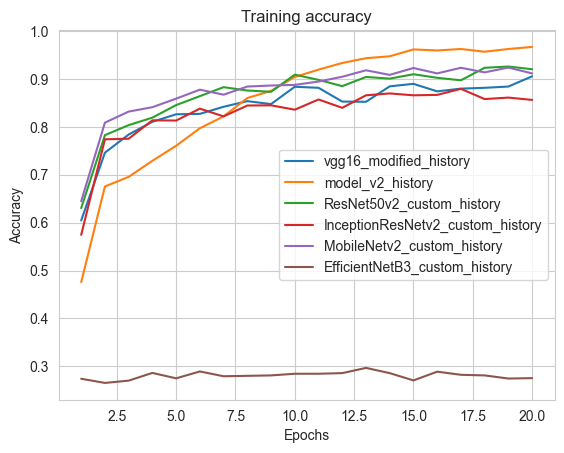

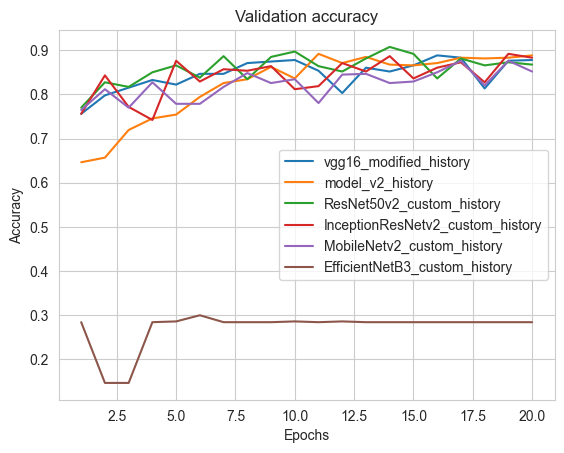

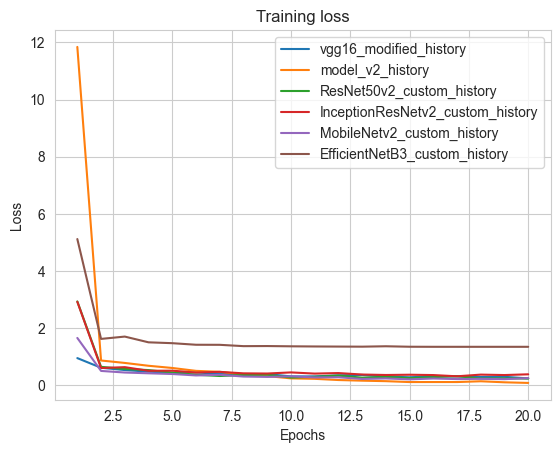

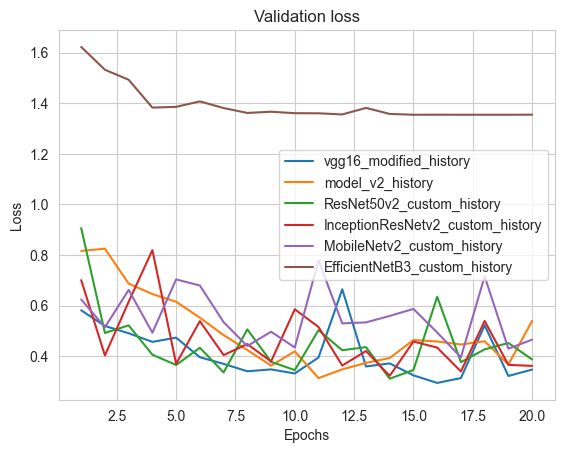

In [4]:
plot_history_models('Saved_models_and_history')